# **Initializing**

In [1]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/1.CDTT/data/UCI_Credit_Card.csv')

In [5]:
#take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [6]:
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
# draw_histograms(late, late.columns, 2, 3, 10)

There are a few problems here, pay is the repayment status and according to the initial dataset the minimum value should be -1. As we can see here, they all have the undocumented label -2. Also, if 1,2,3,etc are delayed months then 0 should be labeled as "valid payment". Therefore, any negative value will be treated as 0.

In [7]:
#renaming of columns
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [8]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: 4, 6: 4,0: 4})

In [9]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: 3})

In [10]:
def assign_group(age):
    if age >= 18 and age <= 24:
        return 0
    elif age >= 25 and age <= 34:
        return 1
    elif age >= 35 and age <= 44:
        return 2
    else:
        return 3

df['AGE_group'] = df['AGE'].apply(assign_group)
df.drop('AGE',axis = 1, inplace = True)
df.head()
# group_age(for i in dfx.AGE)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,AGE_group
0,1,20000.0,2,2,1,2,2,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,2,120000.0,2,2,2,0,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,2,1,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,5,50000.0,1,2,1,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,3


In [11]:
df.drop('ID',axis = 1, inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,AGE_group
0,20000.0,2,2,1,2,2,0,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,120000.0,2,2,2,0,2,0,0,0,2,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,0,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,50000.0,2,2,1,0,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,50000.0,1,2,1,0,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,3


# **Handling Class Imbalance**

## **Kmeans-SMOTE** - Synthetic Minority Oversampling Technique

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import KMeansSMOTE

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')])

# Apply KMeansSMOTE
kmeans_smote = KMeansSMOTE(cluster_balance_threshold=0.2)
x_smote, y_smote = kmeans_smote.fit_resample(df_standardized, df['IsDefaulter'])

# Create a new dataframe from balanced dataset after KMeansSMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))
balanced_df['IsDefaulter'] = y_smote


In [ ]:
#check for class imbalance
# plt.figure(figsize=(5,5))
# sns.countplot('IsDefaulter', data = balanced_df)

In [ ]:
#shape of balanced dataframe
balanced_df.shape

(46730, 24)

In [ ]:
#to display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [ ]:
#correlation among all the features
balanced_df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,AGE_group,IsDefaulter
LIMIT_BAL,1.000000,0.030427,-0.243757,-0.103750,-0.254779,-0.288603,-0.305791,-0.329334,-0.334610,-0.331068,0.334969,0.323789,0.322030,0.321361,0.314344,0.305836,0.221508,0.196962,0.230999,0.226248,0.237837,0.240454,0.147336,-0.338213
SEX,0.030427,1.000000,0.002761,-0.020527,-0.073711,-0.095862,-0.093449,-0.095917,-0.093522,-0.089412,-0.023310,-0.022590,-0.018851,-0.017190,-0.017636,-0.018528,0.010403,0.005439,0.003734,0.000192,0.003836,0.001439,-0.084597,-0.079504
EDUCATION,-0.243757,0.002761,1.000000,-0.155540,0.063137,0.079809,0.075839,0.079712,0.080554,0.073577,-0.028153,-0.032041,-0.035542,-0.045401,-0.051321,-0.052074,-0.048543,-0.037163,-0.048276,-0.046577,-0.052662,-0.051540,0.175255,0.059870
MARRIAGE,-0.103750,-0.020527,-0.155540,1.000000,-0.034100,-0.038089,-0.016025,-0.013923,-0.016292,-0.010835,-0.046367,-0.045367,-0.048535,-0.049045,-0.053433,-0.051103,-0.002327,-0.007433,-0.002693,-0.011937,-0.001190,-0.007885,-0.435581,-0.040216
PAY_SEPT,-0.254779,-0.073711,0.063137,-0.034100,1.000000,0.818018,0.675548,0.648061,0.619547,0.563123,0.044208,0.059115,0.070941,0.094580,0.115957,0.121666,-0.128355,-0.093273,-0.106890,-0.105248,-0.089977,-0.089766,0.012169,0.595509
PAY_AUG,-0.288603,-0.095862,0.079809,-0.038089,0.818018,1.000000,0.787055,0.652005,0.618474,0.560979,0.043569,0.056483,0.069821,0.095605,0.117910,0.125859,-0.144464,-0.099775,-0.107829,-0.103645,-0.091149,-0.089726,0.012082,0.602669
PAY_JUL,-0.305791,-0.093449,0.075839,-0.016025,0.675548,0.787055,1.000000,0.816526,0.753424,0.701749,-0.016919,0.006136,0.017487,0.044726,0.067021,0.075862,-0.103994,-0.114577,-0.111033,-0.109333,-0.099818,-0.100250,-0.004404,0.597320
PAY_JUN,-0.329334,-0.095917,0.079712,-0.013923,0.648061,0.652005,0.816526,1.000000,0.917568,0.856233,-0.061996,-0.043171,-0.023375,0.001640,0.025326,0.035595,-0.120649,-0.093033,-0.127437,-0.115808,-0.113243,-0.109090,0.000981,0.618115
PAY_MAY,-0.334610,-0.093522,0.080554,-0.016292,0.619547,0.618474,0.753424,0.917568,1.000000,0.918186,-0.066882,-0.048835,-0.029608,0.001232,0.024973,0.036152,-0.121590,-0.094323,-0.103278,-0.122439,-0.116118,-0.110430,-0.006532,0.629554
PAY_APR,-0.331068,-0.089412,0.073577,-0.010835,0.563123,0.560979,0.701749,0.856233,0.918186,1.000000,-0.085791,-0.068313,-0.048845,-0.020301,0.008533,0.019874,-0.117004,-0.092119,-0.104753,-0.096951,-0.123401,-0.109844,-0.004560,0.606102


In [ ]:
X.shape

(46730, 23)

In [ ]:
y.shape

(46730,)

# Train Test Splitting

In [12]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,AGE_group
0,20000.0,2,2,1,2,2,0,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0
1,120000.0,2,2,2,0,2,0,0,0,2,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,0,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,50000.0,2,2,1,0,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2
4,50000.0,1,2,1,0,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,3


In [13]:
X = df[(list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = df['IsDefaulter']

In [14]:
from imblearn.over_sampling import SMOTE

#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)


In [15]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_t1 = scaler.fit_transform(X_train_t)

# Transform the test set using the fitted scaler
X_test = scaler.transform(X_test_t)


In [16]:
# Apply KMeansSMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train_t1, y_train_t)



In [17]:
X_train.shape

(37382, 23)

In [18]:
y_train.shape

(37382,)

# **Baseline Model Implementation - SMOTE over-sampling**

## **Logistic Regression Model**

In [19]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [20]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [21]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [22]:
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]

In [23]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_test,y_pred_proba_logi), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.703
The accuracy on test data is  0.774
The precision on test data is  0.553
The recall on test data is  0.49
The f1 on test data is  0.52
The roc_score on test data is  0.746


[[3909  764]
 [ 593  734]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

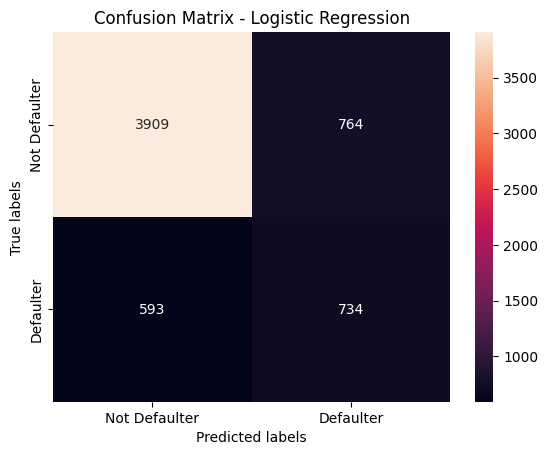

In [24]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classification**

In [25]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [27]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

In [28]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_test,y_pred_proba_dtc), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  0.998
The accuracy on test data is  0.687
The precision on test data is  0.462
The recall on test data is  0.345
The f1 on test data is  0.395
The roc_score on test data is  0.608


[[3511 1162]
 [ 714  613]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

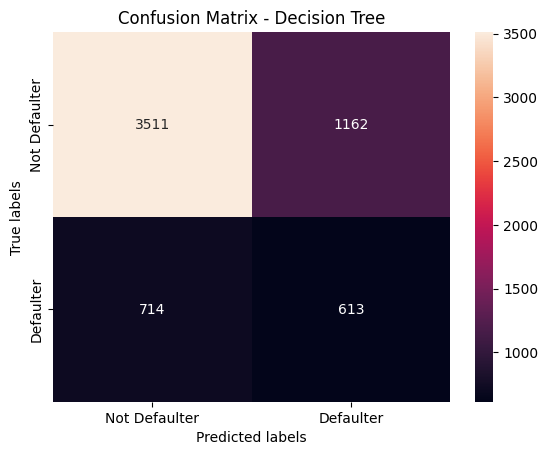

In [29]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [30]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [31]:

#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [33]:
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

In [34]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_test,y_pred_proba_rfc), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.998
The accuracy on test data is  0.784
The precision on test data is  0.471
The recall on test data is  0.513
The f1 on test data is  0.491
The roc_score on test data is  0.741


[[4080  593]
 [ 702  625]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

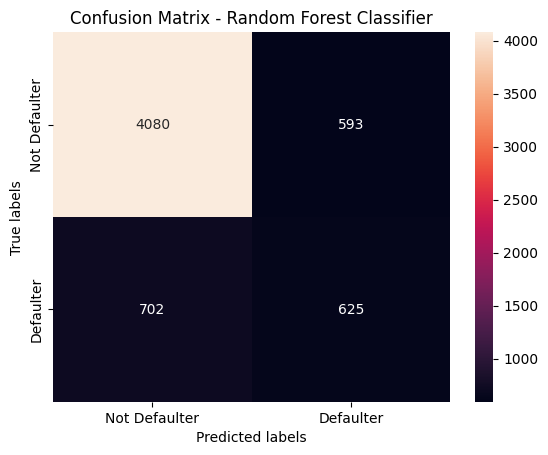

In [35]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Support Vector Machine**

In [36]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [37]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [38]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [39]:
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]

In [40]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_test,y_pred_proba_svm), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.723
The accuracy on test data is  0.756
The precision on test data is  0.572
The recall on test data is  0.458
The f1 on test data is  0.509
The roc_score on test data is  0.751


[[3774  899]
 [ 568  759]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

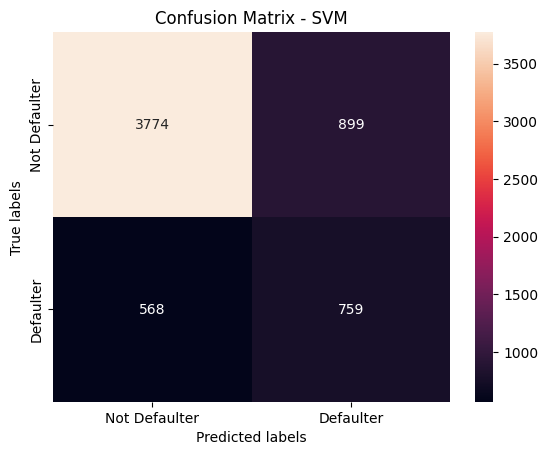

In [41]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Gradient Boosting**

In [42]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [44]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [45]:
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

In [46]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_test,y_pred_proba_gbc), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.796
The accuracy on test data is  0.778
The precision on test data is  0.535
The recall on test data is  0.499
The f1 on test data is  0.517
The roc_score on test data is  0.76


[[3961  712]
 [ 617  710]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

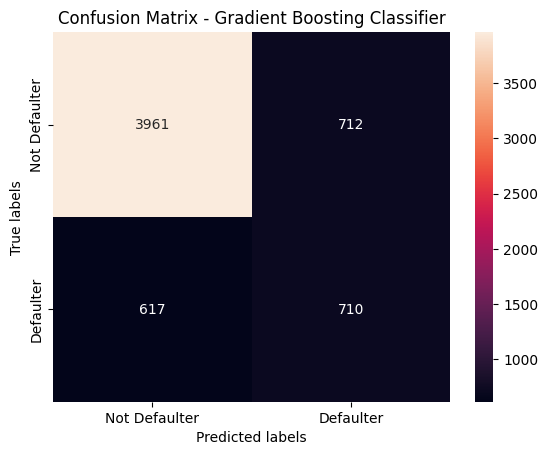

In [47]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True,fmt='d', ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **XG Boosting**

In [48]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [49]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)
# y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


In [51]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

In [52]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_test,y_pred_proba_xgb), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.908
The accuracy on test data is  0.798
The precision on test data is  0.424
The recall on test data is  0.556
The f1 on test data is  0.481
The roc_score on test data is  0.748


[[4224  449]
 [ 764  563]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

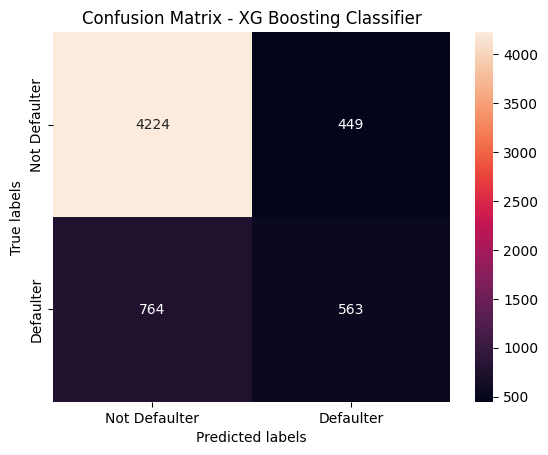

In [53]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='d',ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Baseline Model Comparision**

In [54]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [55]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [56]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.703,0.774,0.553,0.490,0.520,0.746
1,Decision Tree,0.998,0.687,0.462,0.345,0.395,0.608
2,Random Forest,0.998,0.784,0.471,0.513,0.491,0.741
3,SVM,0.723,0.756,0.572,0.458,0.509,0.751
4,Gradient Boosting,0.796,0.778,0.535,0.499,0.517,0.760
5,XG Boosting,0.908,0.798,0.424,0.556,0.481,0.748


In [57]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
5,XG Boosting,0.908,0.798,0.424,0.556,0.481,0.748
2,Random Forest,0.998,0.784,0.471,0.513,0.491,0.741
4,Gradient Boosting,0.796,0.778,0.535,0.499,0.517,0.760
0,Logistic Regression,0.703,0.774,0.553,0.490,0.520,0.746
3,SVM,0.723,0.756,0.572,0.458,0.509,0.751
1,Decision Tree,0.998,0.687,0.462,0.345,0.395,0.608


- Random forest classifier shows highest test accuracy and F1 score.

## Combined ROC curve for all the models

In [58]:
#importing roc curve
from sklearn.metrics import roc_curve

In [59]:

#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


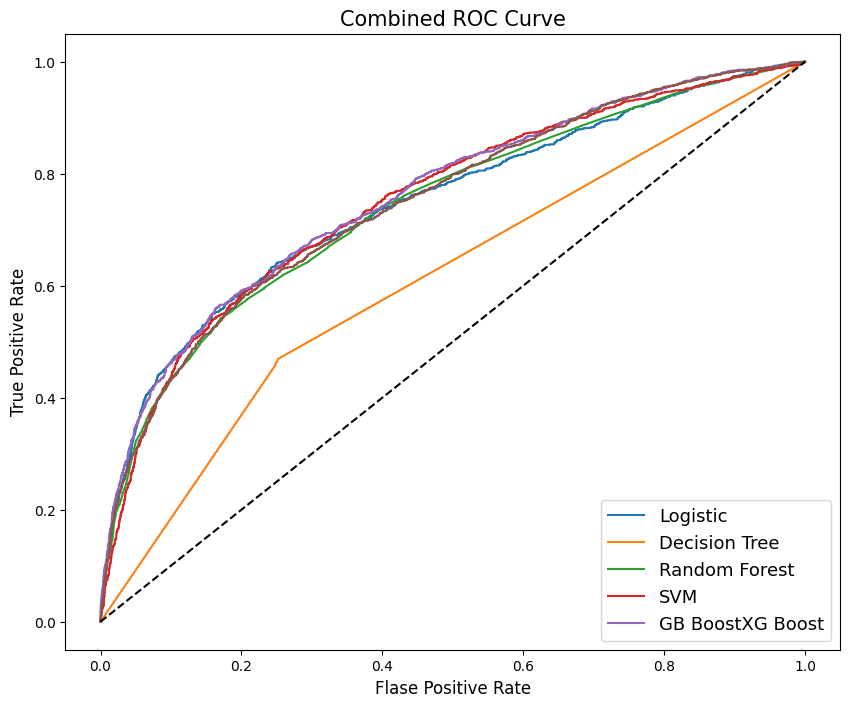

In [60]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [61]:
features = list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')

In [62]:
feature_importances_rfc = rfc.feature_importances_

In [63]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [64]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

LIMIT_BAL        0.085837
PAY_SEPT         0.081886
BILL_AMT_SEPT    0.058572
PAY_AMT_AUG      0.056742
PAY_AMT_SEPT     0.055326
PAY_AMT_JUL      0.054481
PAY_AMT_APR      0.053158
BILL_AMT_APR     0.051576
BILL_AMT_AUG     0.051478
PAY_AMT_MAY      0.050368
BILL_AMT_JUL     0.049734
BILL_AMT_MAY     0.048600
PAY_AMT_JUN      0.048424
BILL_AMT_JUN     0.047058
PAY_AUG          0.038851
dtype: float64

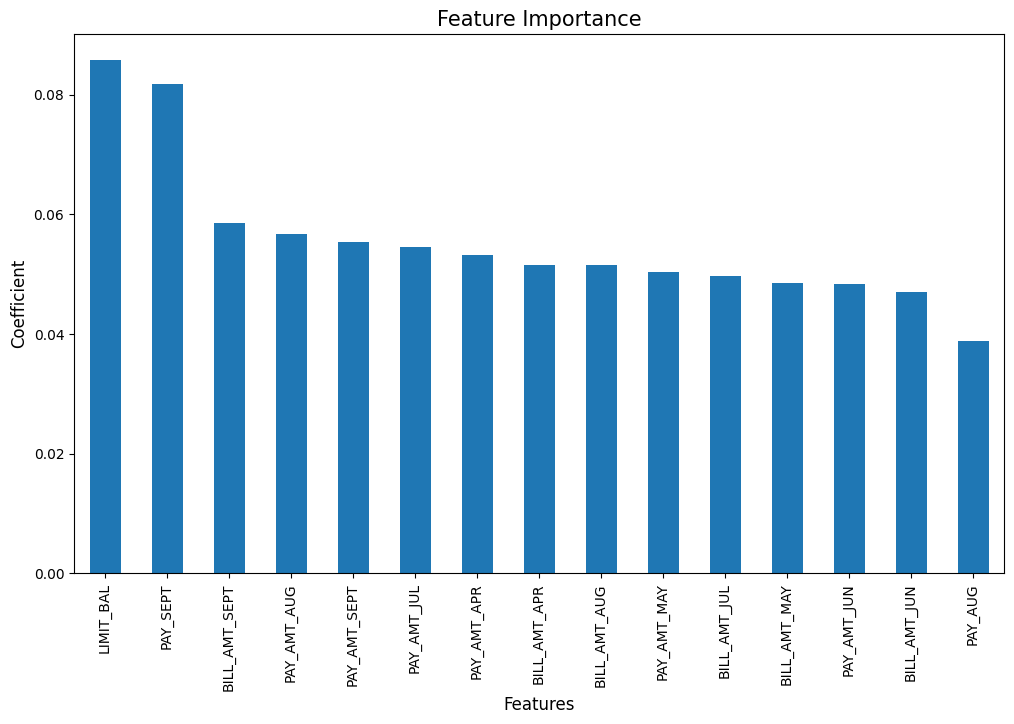

In [65]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

- Above 15 features are the most important features of random forest classifier.

# **Cross Validation & Hyperparameter Tuning ( Grid search CV)**

In [66]:
from sklearn.model_selection import GridSearchCV

## **Logistic Regression Model**

In [67]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500],
              'C' : C }

In [68]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 1.5, 5, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [69]:
logi_grid.best_estimator_

LogisticRegression(C=0.001, penalty='none')

In [70]:
logi_grid.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'none'}

In [71]:
logi_optimal_model = logi_grid.best_estimator_

In [72]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [73]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_test, y_train_pred_prob_logi_grid), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.703
The accuracy on test data is  0.774
The precision on test data is  0.553
The recall on test data is  0.49
The f1 on test data is  0.52
The auc on test data is  0.746


In [74]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [75]:
train_cm_logi_grid

array([[15626,  3065],
       [ 8044, 10647]])

In [76]:
test_cm_logi_grid

array([[3909,  764],
       [ 593,  734]])

### plot

In [77]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_test, y_train_pred_prob_logi_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_logi_grid, "", "", ""],
    ["Test", accuracy_logi_grid, precision_score_logi_grid, recall_score_logi_grid, f1_score_logi_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_logi_grid, accuracy_logi_grid],
#     ["Precision","" ,precision_score_logi_grid],
#     ["Recall","", recall_score_logi_grid],
#     ["F1-Score","" ,f1_score_logi_grid]
#     # ,["AUC", "", auc_logi_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.703 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.774 │ 0.553       │ 0.49     │ 0.52       │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


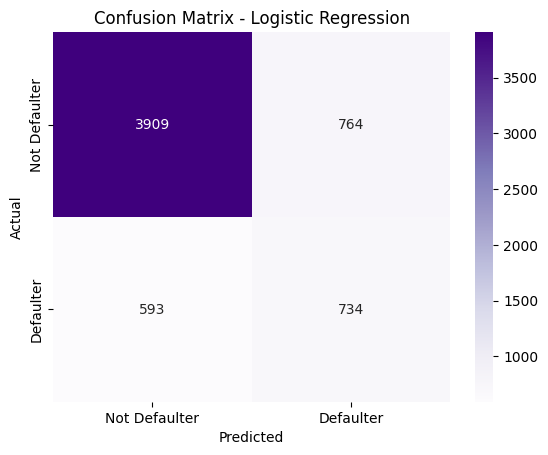

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_logi_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# Hiển thị đồ thị
plt.show()


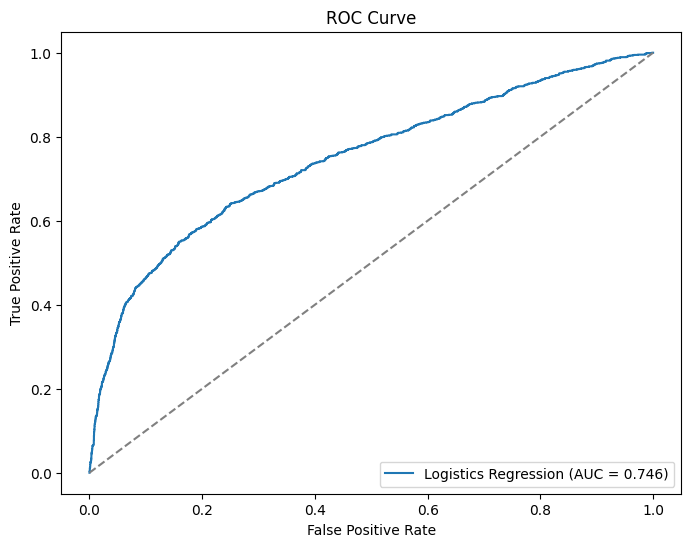

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Logistics Regression"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_logi_grid)


## **Decision Tree Classification**

In [80]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [81]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [82]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=40,
                       min_samples_split=0.001)

In [83]:
dtc_grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [84]:
dtc_optimal_model = dtc_grid.best_estimator_

In [85]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [86]:
# #getting all scores for decision tree after CV and Hyperparameter Tunning
# train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
# accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
# precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
# recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
# f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
# auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_dtc_grid)
# print("The accuracy on test data is ", accuracy_dtc_grid)
# print("The precision on test data is ", precision_score_dtc_grid)
# print("The recall on test data is ", recall_score_dtc_grid)
# print("The f1 on test data is ", f1_score_dtc_grid)
# print("The auc on test data is ", auc_dtc_grid)

In [87]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

### plot

In [88]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid, y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_test, y_train_pred_prob_dtc_grid), 3)


# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_dtc_grid, "", "", ""],
    ["Test", accuracy_dtc_grid, precision_score_dtc_grid, recall_score_dtc_grid, f1_score_dtc_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_dtc_grid, accuracy_dtc_grid],
#     ["Precision","" ,precision_score_dtc_grid],
#     ["Recall","", recall_score_dtc_grid],
#     ["F1-Score","" ,f1_score_dtc_grid],
#     ["AUC", "", auc_dtc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.803 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.73  │ 0.52        │ 0.412    │ 0.46       │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


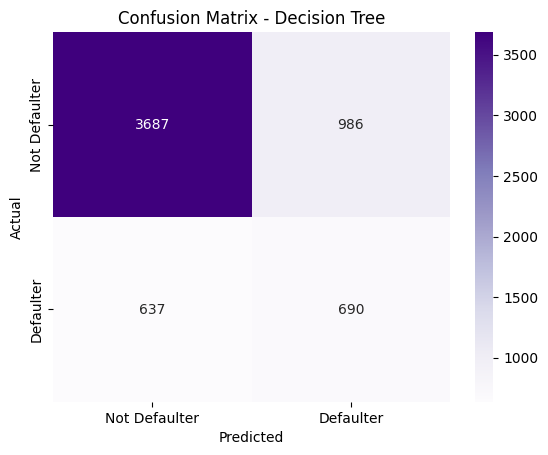

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_dtc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

# Hiển thị đồ thị
plt.show()


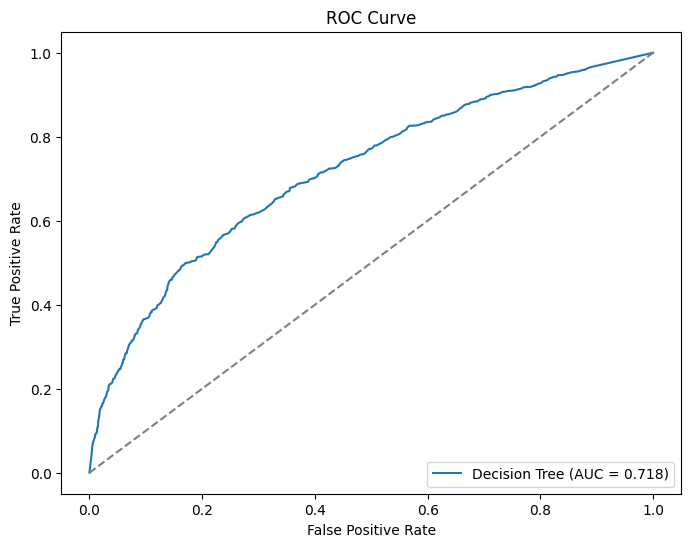

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Decision Tree"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_dtc_grid)

## **Support Vector Machine**

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [93]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [94]:
svm_grid.best_estimator_

SVC(C=10, probability=True)

In [95]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 10}

In [96]:
svm_optimal_model = svm_grid.best_estimator_

In [97]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [98]:
# #getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
# train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
# accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
# precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
# recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
# f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
# auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_svm_grid)
# print("The accuracy on test data is ", accuracy_svm_grid)
# print("The precision on test data is ", precision_score_svm_grid)
# print("The recall on test data is ", recall_score_svm_grid)
# print("The f1 on test data is ", f1_score_svm_grid)
# print("The auc on test data is ", auc_svm_grid)

In [99]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

### plot

In [100]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid, y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_test, y_train_pred_prob_svm_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_svm_grid, "", "", ""],
    ["Test", accuracy_svm_grid, precision_score_svm_grid, recall_score_svm_grid, f1_score_svm_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_svm_grid, accuracy_svm_grid],
#     ["Precision","" ,precision_score_svm_grid],
#     ["Recall","", recall_score_svm_grid],
#     ["F1-Score","" ,f1_score_svm_grid],
#     ["AUC", "", auc_svm_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.753 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.757 │ 0.542       │ 0.458    │ 0.496      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


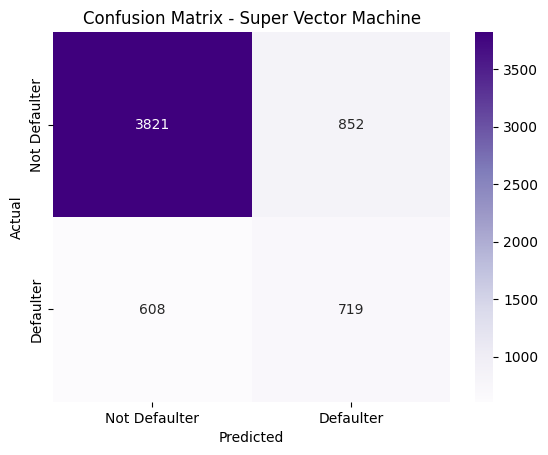

In [101]:

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_svm_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Super Vector Machine')

# Hiển thị đồ thị
plt.show()


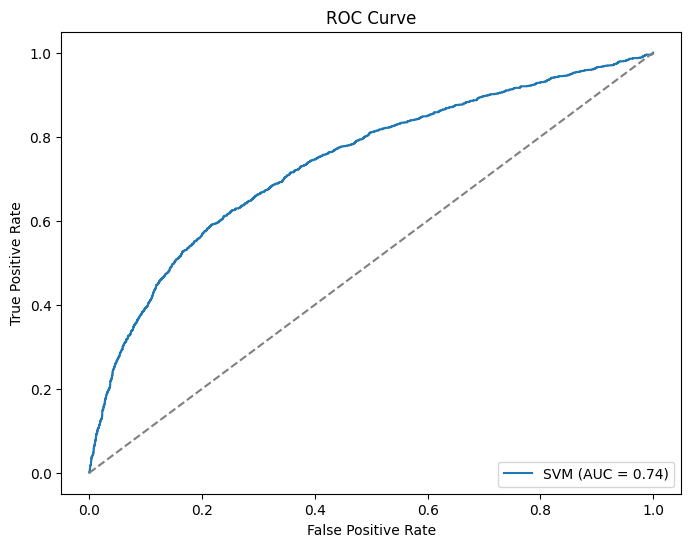

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"SVM"} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_svm_grid)

## **Random Forest Classifer**

In [103]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [104]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   7.7s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [105]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [106]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [107]:
rfc_optimal_model = rfc_grid.best_estimator_

In [108]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [109]:
# #getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
# train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
# accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
# precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
# recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
# f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
# auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_rfc_grid)
# print("The accuracy on test data is ", accuracy_rfc_grid)
# print("The precision on test data is ", precision_score_rfc_grid)
# print("The recall on test data is ", recall_score_rfc_grid)
# print("The f1 on test data is ", f1_score_rfc_grid)
# print("The auc on test data is ", auc_rfc_grid)

In [110]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

### plot

In [111]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid, y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_test, y_train_pred_prob_rfc_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_rfc_grid, "", "", ""],
    ["Test", accuracy_rfc_grid, precision_score_rfc_grid, recall_score_rfc_grid, f1_score_rfc_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_rfc_grid, accuracy_rfc_grid],
#     ["Precision","" ,precision_score_rfc_grid],
#     ["Recall","", recall_score_rfc_grid],
#     ["F1-Score","" ,f1_score_rfc_grid],
#     ["AUC", "", auc_rfc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.798 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.769 │ 0.588       │ 0.481    │ 0.529      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


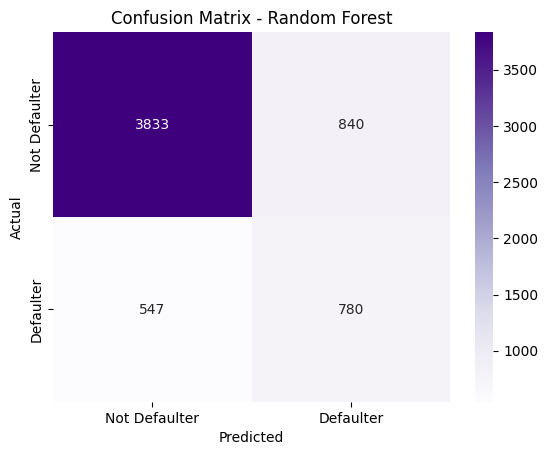

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_rfc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Hiển thị đồ thị
plt.show()


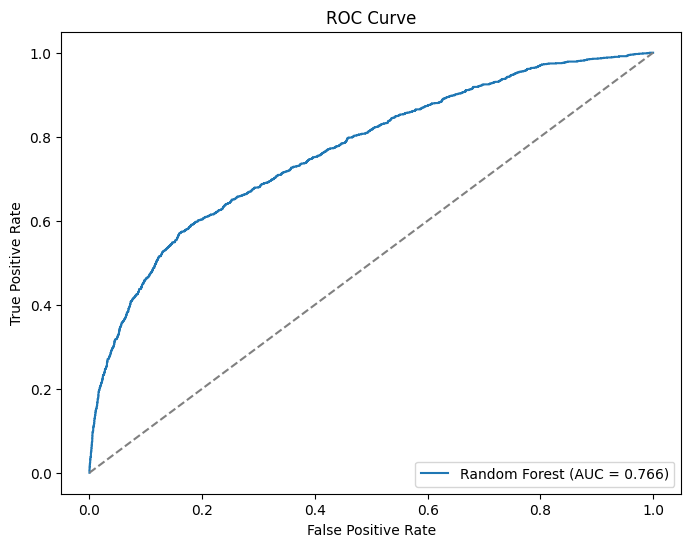

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Random Forest"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_rfc_grid)

## **Gradient Boosting**

In [114]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [115]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  38.8s
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  37.4s
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.5min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time= 1.4min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time= 1.0min
[CV] END learning_rate=1, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  48.1s
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  56.7s
[CV] END learning_rate=0.5, max_depth=30, min_samples_leaf=50, min_samples_split=1

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [116]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=50,
                           min_samples_split=100, n_estimators=200,
                           random_state=42)

In [117]:
gbc_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_depth': 30,
 'learning_rate': 0.1}

In [118]:
gbc_optimal_model = gbc_grid.best_estimator_

In [119]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [120]:
# #getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
# train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
# accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
# precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
# recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
# f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
# auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

# print("The accuracy on train data is ", train_accuracy_gbc_grid)
# print("The accuracy on test data is ", accuracy_gbc_grid)
# print("The precision on test data is ", precision_score_gbc_grid)
# print("The recall on test data is ", recall_score_gbc_grid)
# print("The f1 on test data is ", f1_score_gbc_grid)
# print("The auc on test data is ", auc_gbc_grid)

In [121]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

### plot

In [122]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid, y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_test, y_train_pred_prob_gbc_grid), 3)

# Create a table with the evaluation metrics
# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_gbc_grid, "", "", ""],
    ["Test", accuracy_gbc_grid, precision_score_gbc_grid, recall_score_gbc_grid, f1_score_gbc_grid]
]

# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_gbc_grid, accuracy_gbc_grid],
#     ["Precision","" ,precision_score_gbc_grid],
#     ["Recall","", recall_score_gbc_grid],
#     ["F1-Score","" ,f1_score_gbc_grid],
#     ["AUC", "", auc_gbc_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.996 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.799 │ 0.424       │ 0.559    │ 0.482      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


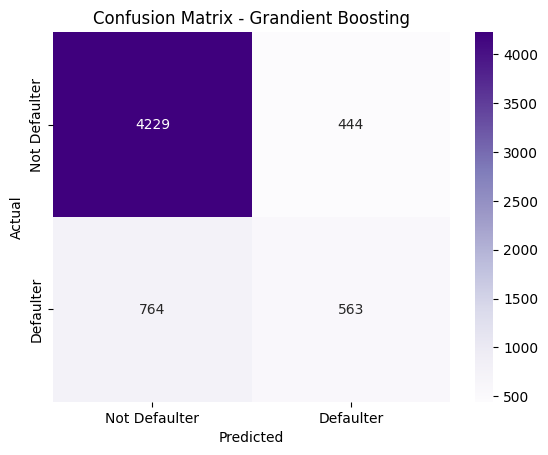

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_gbc_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Grandient Boosting')

# Hiển thị đồ thị
plt.show()


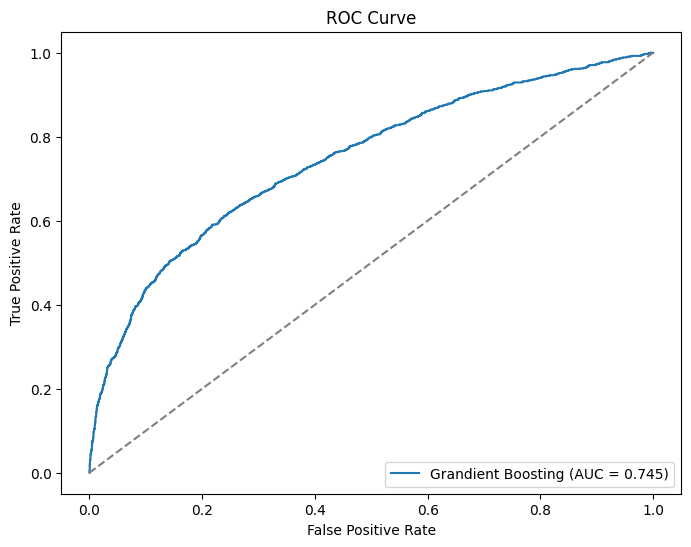

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"Grandient Boosting"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_gbc_grid)

## **XG Boosting**

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [127]:
# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[12:05:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [128]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=1, min_samples_leaf=40, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [129]:
xgb_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 25,
 'learning_rate': 0.1,
 'gamma': 0.3}

In [130]:
xgb_optimal_model = xgb_grid.best_estimator_

In [131]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [132]:
# #getting all scores for XG Boosting after CV and Hyperparameter Tunning
# train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
# accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
# precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
# recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
# f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
# auc_xgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_xgb_grid), 3)

# print("The accuracy on train data is ", train_accuracy_xgb_grid)
# print("The accuracy on test data is ", accuracy_xgb_grid)
# print("The precision on test data is ", precision_score_xgb_grid)
# print("The recall on test data is ", recall_score_xgb_grid)
# print("The f1 on test data is ", f1_score_xgb_grid)
# print("The auc on test data is ", auc_xgb_grid)

In [133]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

### plot

In [134]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid, y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_xgb_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_xgb_grid, "", "", ""],
    ["Test", accuracy_xgb_grid, precision_score_xgb_grid, recall_score_xgb_grid, f1_score_xgb_grid]
]

# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_xgb_grid, accuracy_xgb_grid],
#     ["Precision","" ,precision_score_xgb_grid],
#     ["Recall","", recall_score_xgb_grid],
#     ["F1-Score","" ,f1_score_xgb_grid],
#     ["AUC", "", auc_xgb_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.997 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.792 │ 0.425       │ 0.539    │ 0.475      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


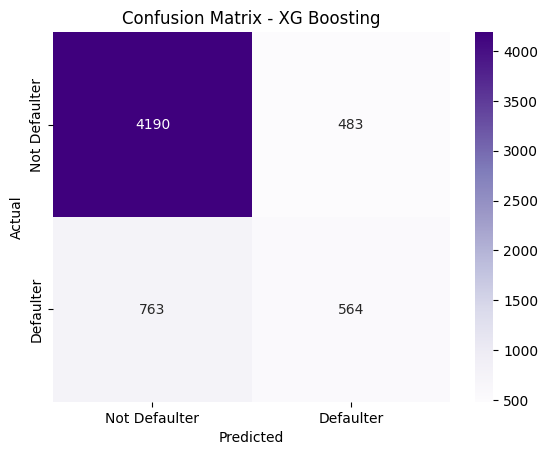

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']

# Vẽ confusion matrix bằng seaborn
heatmap = sns.heatmap(test_cm_xgb_grid, annot=True,fmt='d', cmap='Purples')
heatmap.xaxis.set_ticklabels(labels)
heatmap.yaxis.set_ticklabels(labels)

# Thiết lập tên các trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boosting')

# Hiển thị đồ thị
plt.show()


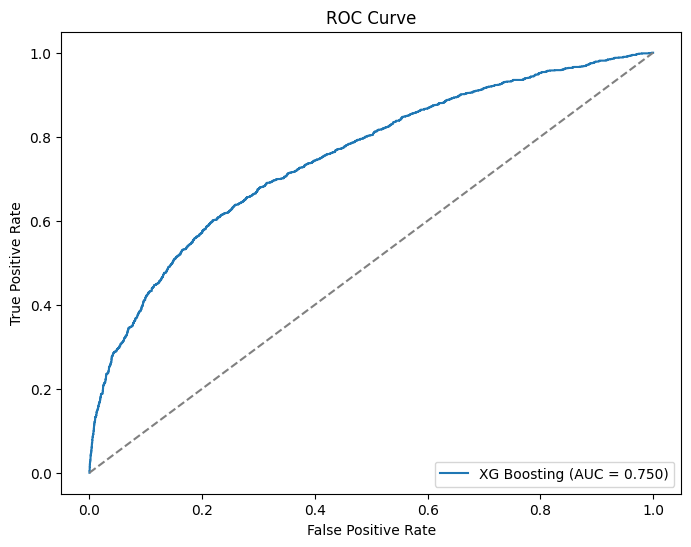

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"XG Boosting"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_xgb_grid)



## **LightGBM**

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
# Hyperparameter Grid
param_dict_lgb = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'num_leaves': [31, 50],
              'min_samples_leaf' : [40, 50]}



In [139]:
# Create an instance of the XGBClassifier
import lightgbm as lgb
lgb = lgb.LGBMClassifier()

# Grid search
lgb_grid = RandomizedSearchCV(estimator=lgb,
                       param_distributions = param_dict_lgb,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
lgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250],
                                        'num_leaves': [31, 50]},
                   scoring='roc_auc', verbose=2)

In [140]:
lgb_grid.best_estimator_

LGBMClassifier(gamma=0.3, max_depth=25, min_child_weight=1, min_samples_leaf=40,
               n_estimators=250, num_leaves=50)

In [141]:
lgb_grid.best_params_

{'num_leaves': 50,
 'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 25,
 'learning_rate': 0.1,
 'gamma': 0.3}

In [142]:
lgb_optimal_model = lgb_grid.best_estimator_

In [143]:
#class prediction of y on train and test
y_pred_lgb_grid=lgb_optimal_model.predict(X_test)
y_train_pred_lgb_grid=lgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_lgb_grid = lgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_lgb_grid = lgb_optimal_model.predict_proba(X_test)[:,1]

In [144]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
# train_accuracy_lgb_grid = round(accuracy_score(y_train_pred_lgb_grid,y_train), 3)
# accuracy_lgb_grid = round(accuracy_score(y_pred_lgb_grid,y_test), 3)
# precision_score_lgb_grid = round(precision_score(y_pred_lgb_grid,y_test), 3)
# recall_score_lgb_grid = round(recall_score(y_pred_lgb_grid,y_test), 3)
# f1_score_lgb_grid = round(f1_score(y_pred_lgb_grid,y_test), 3)
# auc_lgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_lgb_grid), 3)

# print("The accuracy on train data is ", train_accuracy_lgb_grid)
# print("The accuracy on test data is ", accuracy_lgb_grid)
# print("The precision on test data is ", precision_score_lgb_grid)
# print("The recall on test data is ", recall_score_lgb_grid)
# print("The f1 on test data is ", f1_score_lgb_grid)
# print("The auc on test data is ", auc_lgb_grid)

In [145]:
# Get the confusion matrices for train and test
train_cm_lgb_grid = confusion_matrix(y_train,y_train_pred_lgb_grid)
test_cm_lgb_grid = confusion_matrix(y_test,y_pred_lgb_grid )
# train_cm_xgb_grid

### plot

In [146]:
from tabulate import tabulate
from sklearn.metrics import classification_report, accuracy_score


train_accuracy_lgb_grid = round(accuracy_score(y_train_pred_lgb_grid,y_train), 3)
accuracy_lgb_grid = round(accuracy_score(y_pred_lgb_grid,y_test), 3)
precision_score_lgb_grid = round(precision_score(y_pred_lgb_grid,y_test), 3)
recall_score_lgb_grid = round(recall_score(y_pred_lgb_grid,y_test), 3)
f1_score_lgb_grid = round(f1_score(y_pred_lgb_grid,y_test), 3)
auc_lgb_grid = round(roc_auc_score(y_test, y_train_pred_prob_lgb_grid), 3)

# Create a table with the evaluation metrics
table_data = [
    ["Metric", "Accuracy", "Precision", "Recall", "F1-Score"],
    ["Train", train_accuracy_lgb_grid, "", "", ""],
    ["Test", accuracy_lgb_grid, precision_score_lgb_grid, recall_score_lgb_grid, f1_score_lgb_grid]
]
# table_data = [
#     ["Metric", "Train", "Test"],
#     ["Accuracy", train_accuracy_logi_grid, accuracy_logi_grid],
#     ["Precision","" ,precision_score_logi_grid],
#     ["Recall","", recall_score_logi_grid],
#     ["F1-Score","" ,f1_score_logi_grid]
#     # ,["AUC", "", auc_logi_grid]
# ]

table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")

# Print the table
print(table)


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Accuracy │ Precision   │ Recall   │ F1-Score   │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ Train    │      0.924 │             │          │            │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ Test     │      0.798 │ 0.419       │ 0.558    │ 0.478      │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


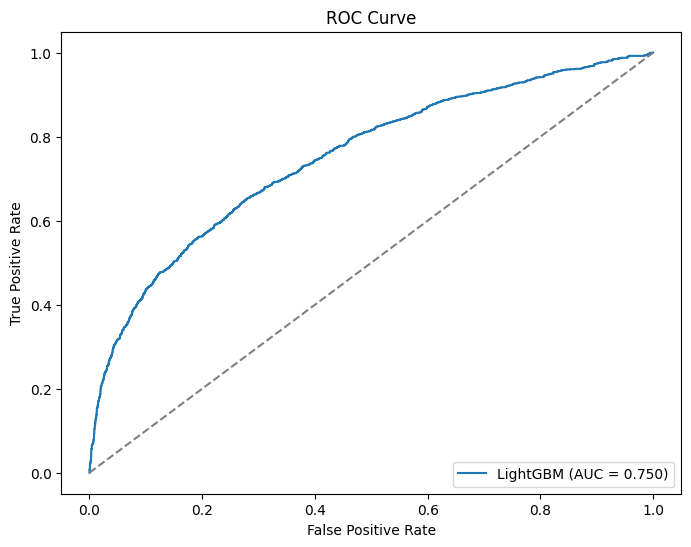

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc_curve(y_train_pred_prob_model_grid):
    plt.figure(figsize=(8, 6))

    y_pred_proba = y_train_pred_prob_model_grid
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{"LightGBM"} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # plt.text(0.8, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
    plt.show()

plot_auc_roc_curve(y_train_pred_prob_lgb_grid)



# **Final Model Comparision**

In [148]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [149]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [150]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [151]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [152]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [153]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
8,Optimal Random Forest,0.798,0.769,0.588,0.481,0.529,0.766
4,Gradient Boosting,0.796,0.778,0.535,0.499,0.517,0.760
3,SVM,0.723,0.756,0.572,0.458,0.509,0.751
11,Optimal XG Boosting,0.997,0.792,0.425,0.539,0.475,0.750
5,XG Boosting,0.908,0.798,0.424,0.556,0.481,0.748
0,Logistic Regression,0.703,0.774,0.553,0.490,0.520,0.746
6,Optimal Logistic Regression,0.703,0.774,0.553,0.490,0.520,0.746
10,Optimal Gradient Boosting,0.996,0.799,0.424,0.559,0.482,0.745
2,Random Forest,0.998,0.784,0.471,0.513,0.491,0.741
9,Optimal SVM,0.753,0.757,0.542,0.458,0.496,0.738
